In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

Exploring categories

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


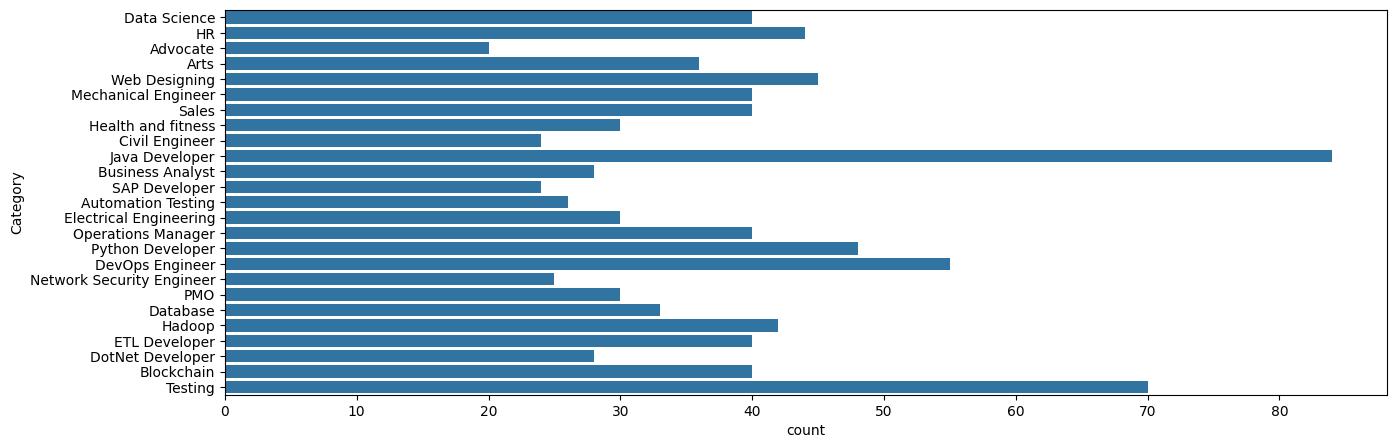

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [ ]:
counts=df['Category'].value_counts()

In [ ]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [ ]:
def preprocess_resume_data(resumes_df):
    # Ensure all columns are strings and handle missing values
    resumes_df['Category'] = resumes_df['Category'].fillna('').astype(str)
    resumes_df['Resume'] = resumes_df['Resume'].fillna('').astype(str)

    return resumes_df

# Preprocess the dataset
df = preprocess_resume_data(df)

In [ ]:
def analyze_job_description(job_description):
    doc = nlp(job_description)
    required_skills = []
    required_experiences = []
    required_qualifications = []

    for ent in doc.ents:
        if ent.label_ == 'SKILL':
            required_skills.append(ent.text)
        elif ent.label_ == 'ORG':
            required_experiences.append(ent.text)
        elif ent.label_ == 'DEGREE':
            required_qualifications.append(ent.text)

    return {
        'required_skills': list(set(required_skills)),
        'required_experiences': list(set(required_experiences)),
        'required_qualifications': list(set(required_qualifications))
    }

Cleaning the text

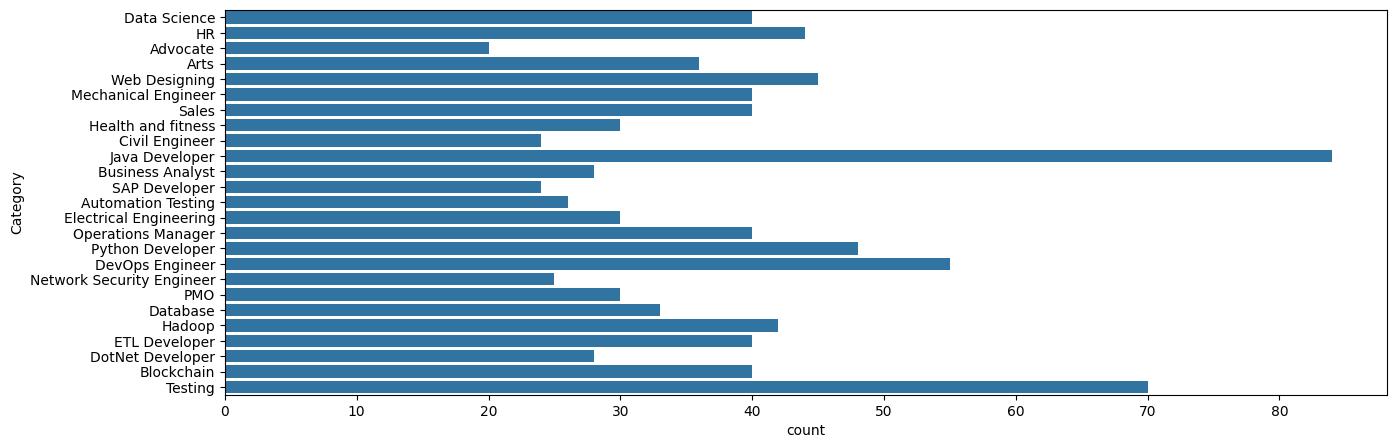

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import the re module
import re
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %%
df = pd.read_csv("UpdatedResumeDataSet.csv")
# %%
df.head()
# %%
df.shape
# %% [markdown]
# Exploring categories
# %%
df['Category'].value_counts()
# %%
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()
# %%
counts=df['Category'].value_counts()
# %%
df.columns
# %%
def preprocess_resume_data(resumes_df):
    # Ensure all columns are strings and handle missing values
    resumes_df['Category'] = resumes_df['Category'].fillna('').astype(str)
    resumes_df['Resume'] = resumes_df['Resume'].fillna('').astype(str)

    return resumes_df

# Preprocess the dataset
df = preprocess_resume_data(df)
# %%
#install spacy if needed
!pip install spacy
import spacy
# Load the spaCy language model (you may need to download it first: python -m spacy download en_core_web_sm)
try:
  nlp = spacy.load("en_core_web_sm")
except OSError:
  !python -m spacy download en_core_web_sm
  nlp = spacy.load("en_core_web_sm")

def analyze_job_description(job_description):
    doc = nlp(job_description)
    required_skills = []
    required_experiences = []
    required_qualifications = []

    for ent in doc.ents:
        if ent.label_ == 'SKILL':
            required_skills.append(ent.text)
        elif ent.label_ == 'ORG':
            required_experiences.append(ent.text)
        elif ent.label_ == 'DEGREE':
            required_qualifications.append(ent.text)

    return {
        'required_skills': list(set(required_skills)),
        'required_experiences': list(set(required_experiences)),
        'required_qualifications': list(set(required_qualifications))
    }
# %% [markdown]
# Cleaning the text
# %%
#download nltk dependencies
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Convert text to lowercase
df['Resume'] = df['Resume'].str.lower()

# Remove special characters, numbers, and extra spaces
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Resume'] = df['Resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# %%

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Encode the 'Category' column into numerical labels
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Display the mapping of categories to encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

Category Mapping: {'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}


<ipython-input-55-39a08ef260ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


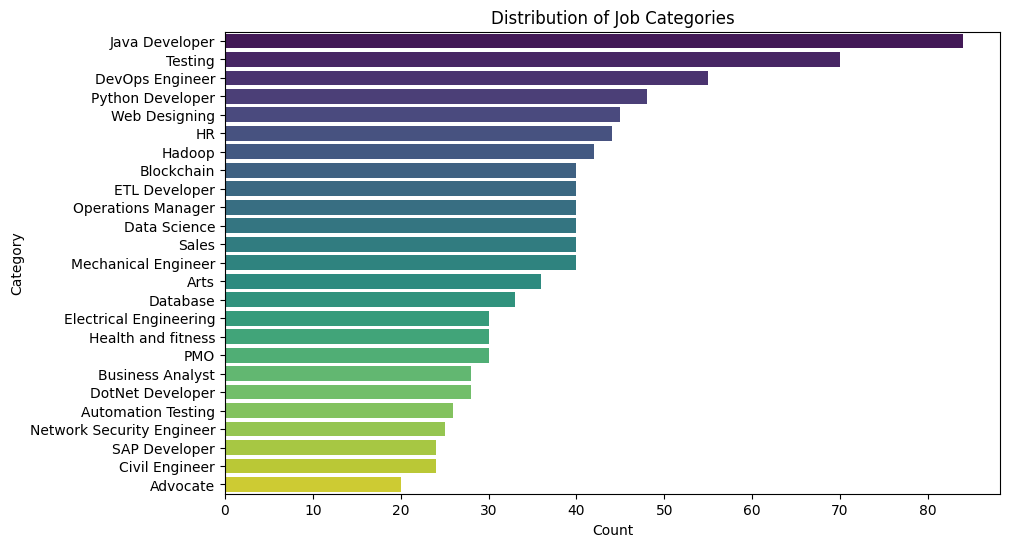

In [ ]:
# Plot the distribution of job categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [ ]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run analytics genera

<ipython-input-57-d1cc4b7c2992>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='plasma')


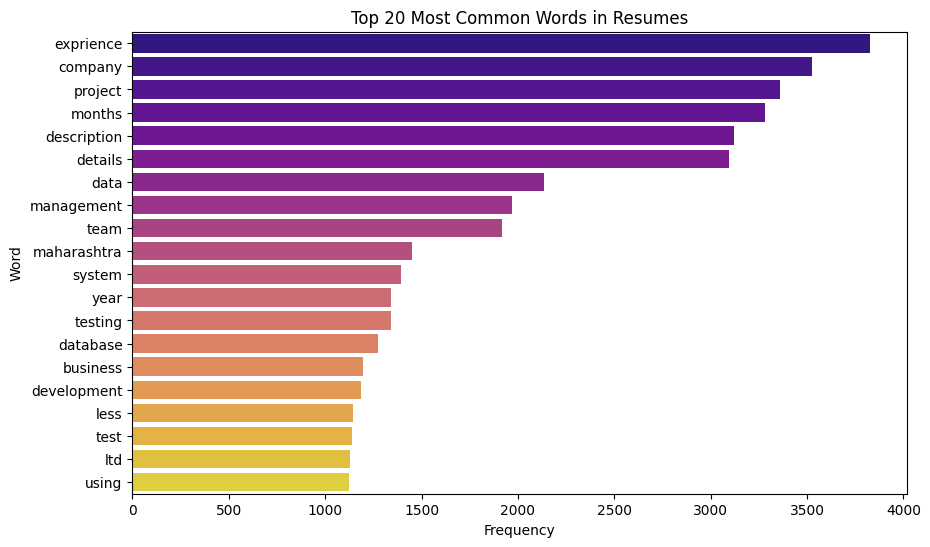

In [ ]:
# Get the most common words across all resumes
from collections import Counter

all_words = ' '.join(df['Resume']).split()
word_freq = Counter(all_words)

# Plot the top 20 most common words
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='plasma')
plt.title('Top 20 Most Common Words in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [ ]:
# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_resumes.csv', index=False)

Vactorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the resume text
X = tfidf.fit_transform(df['Resume']).toarray()

# Target variable (encoded categories)
y = df['Category_Encoded']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (769, 5000)
Testing data shape: (193, 5000)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, ypred, target_names=label_encoder.classes_))

0.9792746113989638
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       0.75      0.60      0.67         5
                 Database       1.00      0.88      0.93         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   

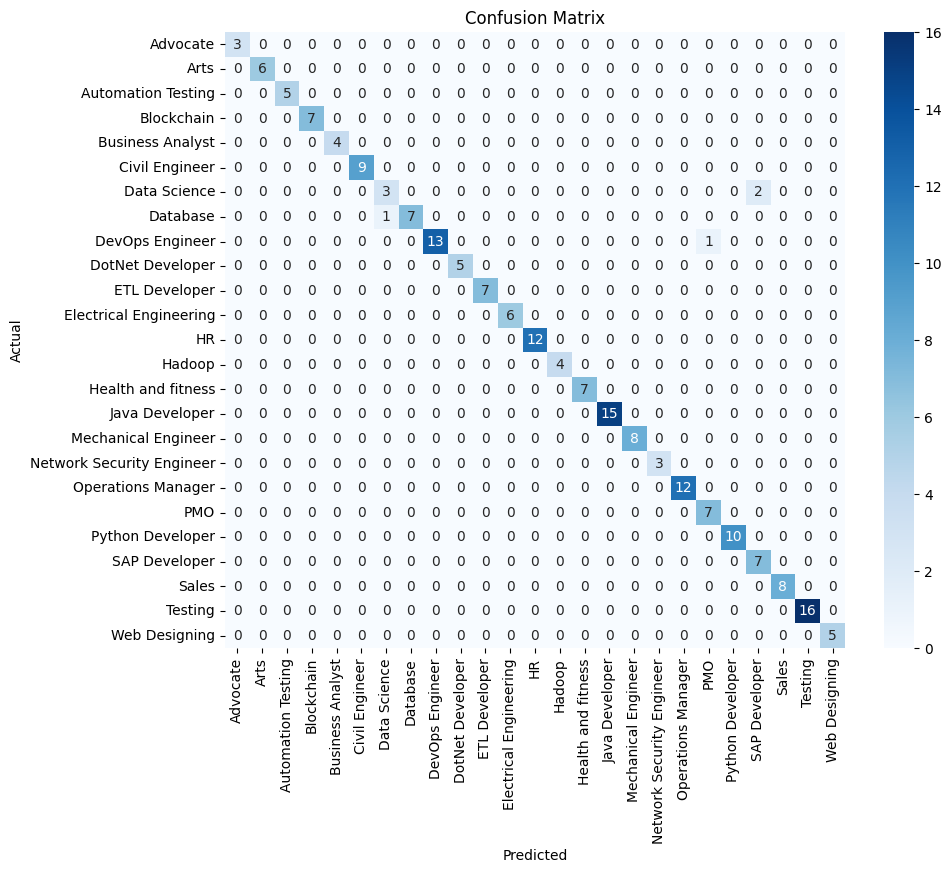

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

#We need to refer to clf here, not the undefined variable model.
# Save the model
joblib.dump(clf, 'resume_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
# Load the model, vectorizer, and label encoder
model = joblib.load('resume_classifier_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Example: Predict the category of a new resume
new_resume = ["Experienced software engineer with expertise in Python, machine learning, and data analysis."]
new_resume_tfidf = tfidf.transform(new_resume).toarray()
predicted_category = model.predict(new_resume_tfidf)

# Decode the predicted category
predicted_category_name = label_encoder.inverse_transform(predicted_category)
print("Predicted Category:", predicted_category_name[0])

Predicted Category: Data Science


In [ ]:
# Import necessary libraries
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the trained model
model = joblib.load('resume_classifier_model.pkl')

# Define the parameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example: Number of neighbors to use
    'weights': ['uniform', 'distance'], # Example: weight function used in prediction
    'metric': ['euclidean', 'manhattan'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV with KNeighborsClassifier
# We refer to the previously defined clf in this block instead of KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
# Predict on the test set
y_pred_tuned = best_model.predict(X_test)

# Calculate accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)

# Generate a classification report
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))

Tuned Model Accuracy: 0.9948186528497409
Tuned Model Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      

In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'tuned_resume_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']